In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
# Create Dataset
X,y =make_blobs(n_samples = 1000,n_features = 2,centers=2,random_state=0)
# basically you can make your regression /classification dataset through such methods.It is
# one of them.
dataset_array = np.concatenate((X,y.reshape(-1,1)),axis=1)
# Create a DataFrame of the array
dataset_df = pd.DataFrame(dataset_array,columns = ['Col 1','Col 2', 'Target'])

In [6]:
dataset_df.head()

,Col 1,Col 2,Target
0,0.466618,3.865713,0.0
1,2.843828,3.326509,0.0
2,0.611215,2.512460,0.0
3,3.816534,1.651759,1.0
4,1.280972,0.628274,1.0


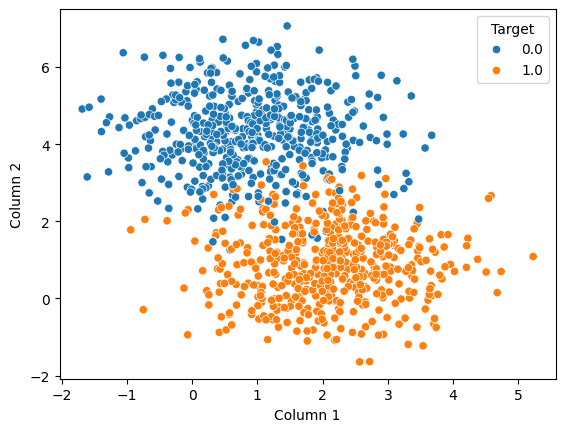

In [8]:
sns.scatterplot(data=dataset_df,x='Col 1',y='Col 2',hue ='Target')
plt.xlabel('Column 1')
plt.ylabel('Column 2');

# Function for logistic regression 

In [12]:
# Build a logistic regression cassifier

# 0. Helper function: sigmoid
def sigmoid(x):
    '''sigmoid(x) = 1 / (1 + e^(-x))'''
    return 1/(1+np.exp(-x))


# 1.Hypothesis
def hypothesis(x,theta):
    #h(x) = sigmoid(X.theta)
    z = np.dot(X,theta)
    return sigmoid(z)

# 2. Loss function: Binary Cross Entripy
#  to get better idea try to print all of these by adding print statement in the function itself.
def binary_cross_entropy(x,y,theta):
    # Ususally we consider binary_cross_entropy as lods function(NOT ALWAYS) for binary classification
    m,n = x.shape
    # print(x.shape)
    # a. Compute the hypothesis
    y_hat = hypothesis(x,theta)
    #print(y_hat)
    # b.Compute the Binary Cross Entropy
    loss = y*np.log(y_hat)+ (1-y)*np.log(1-y_hat)
    # print (np.log(y_hat))

    return -np.mean(loss)

# 3. Compute the gradient
def gradient(x,y,theta):
    # compute hypothesis
    y_hat = hypothesis(x,theta)
    #compute gradient
    grad = np.dot(x.T,(y-y_hat))
    return -grad/x.shape[0]

# 4. Gradient descent
def gradient_descent(x,y,n_iter =100,alpha=0.1): # Try to mingle with n_iter and alpha to see what happens whan you change them
    # a. Randomly intialise theta
    m,n =x.shape
    theta = np.zeros(shape=(n, ))

    # List to store the error
    error = []

    # b. Perform the gradient descent
    for i in range(n_iter):
        '''
        y_hat = hypothesis(x,theta)
        print(y_hat,y_hat.shape)
        '''

        # b.1 Compute the loss
        loss = binary_cross_entropy(x,y,theta)
        error.append(loss)

        # b.2 Compute Gradient
        grad = gradient(x,y,theta)

        # b.3 Perform the update rule
        theta = theta - alpha*grad

    return theta,error
        
    

In [16]:
#1 Add constant 
dataset_df_copy = dataset_df.copy()
dataset_df_copy.insert(0,'Constant',np.ones(shape=(dataset_df_copy.shape[0],1)))

In [17]:
X = dataset_df_copy.drop('Target',axis=1)
y= dataset_df_copy['Target']

theta,error = gradient_descent(X,y,10000)

In [18]:
print(theta)
print('******')
print(error[-1])

[ 6.40438387  0.85948565 -2.95962436]
******
0.10464193323189752


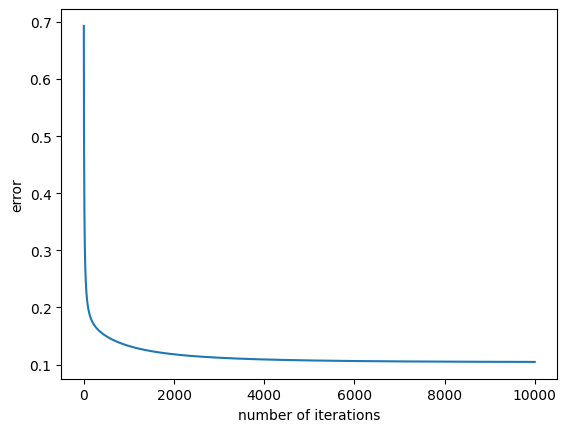

In [19]:
plt.plot(error)
plt.xlabel(
    'number of iterations'
)
plt.ylabel("error")
plt.show()

# PLOTTING DATASET

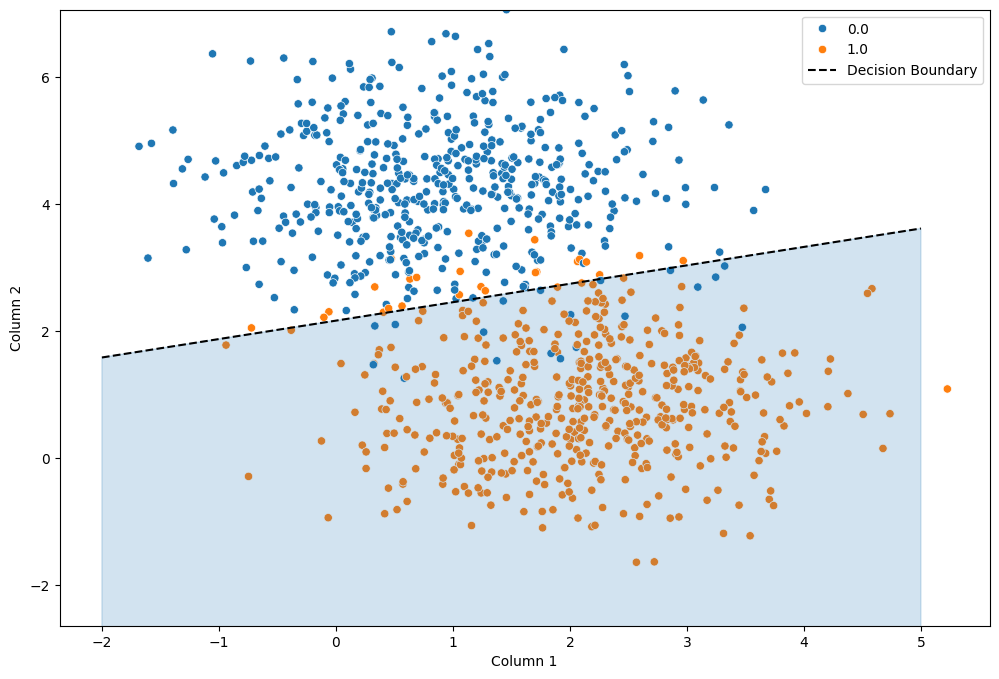

In [21]:
# plot the dataset along with the deicision boundary

# Create Decision Boundary
x2_max,x2_min = X['Col 2'].max(),X['Col 2'].min()
x1_max,x1_min = X['Col 1'].max(),X['Col 1'].min()

x_vals = np.array([-2,5])
slope = -theta[1]/theta[2]
intercept = -theta[0]/theta[2]
decision_boundary = slope*x_vals +intercept

# Plot the dataset with decision boundary
plt.figure(figsize=(12,8))
sns.scatterplot(data=dataset_df,x='Col 1',y='Col 2',hue='Target')
plt.plot(x_vals,decision_boundary,linestyle='--',color='black',label='Decision Boundary')
plt.fill_between(x_vals,decision_boundary,x2_min-10,color = 'tab:blue',alpha=0.2)
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.ylim(x2_min-1,x2_max)
plt.legend(loc='best')
plt.show()

# Comparing the results with sklearn's logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X.drop('Constant',axis=1),y)
theta_sklearn = lr.coef_
intercept_sklearn=lr.intercept_

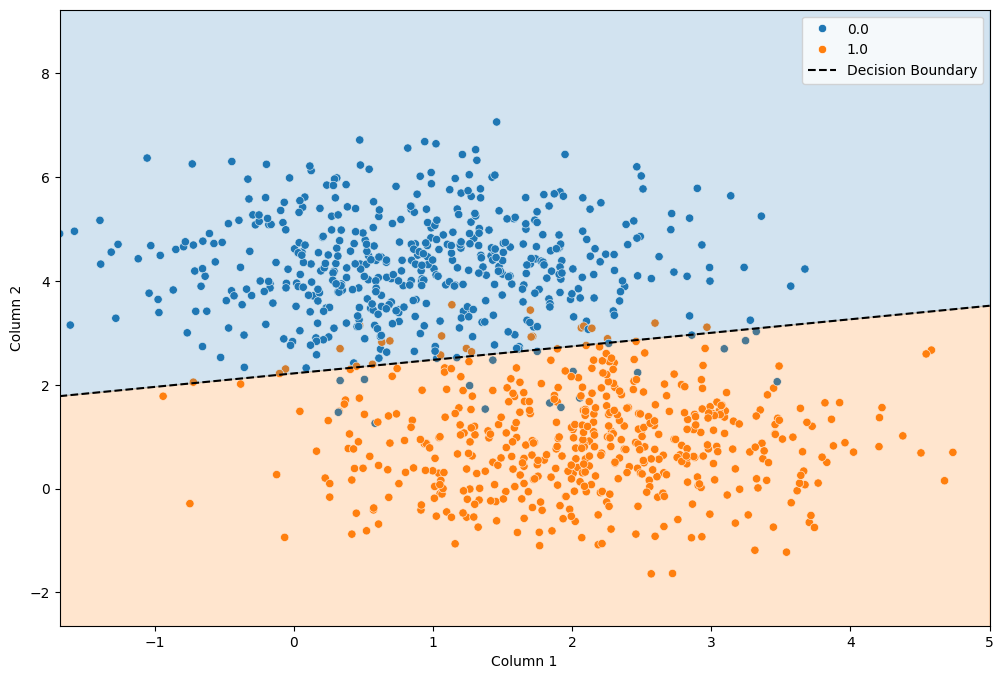

In [24]:
x2_max, x2_min = X['Col 2'].max(), X['Col 2'].min()
x1_max, x1_min = X['Col 1'].max(), X['Col 1'].min()

x_vals = np.array([-2, 5])
slope = - theta_sklearn[0][0] / theta_sklearn[0][1]
intercept = - intercept_sklearn / theta_sklearn[0][1]
decision_boundary = slope * x_vals + intercept

# Plot the dataset with decision bounddart
plt.figure(figsize=(12,8))
sns.scatterplot(data=dataset_df, x='Col 1', y='Col 2', hue='Target')
plt.plot(x_vals, decision_boundary, linestyle='--', color='black', label='Decision Boundary')
plt.fill_between(x_vals, decision_boundary, x2_min-10, color='tab:orange', alpha=0.2)
plt.fill_between(x_vals, decision_boundary, x2_max+10, color='tab:blue', alpha=0.2)
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.ylim(x2_min-1, x1_max+4)
plt.xlim(x1_min, 5)
plt.legend(loc='best')
plt.show()

In [25]:
# Print the Custom Logisit Regression's results
print("Weights of variable given out by custom Logistic Regression")
print("Col 1: {}".format(theta[1]))
print("Col 2: {}".format(theta[2]))
print("Intercept : {}".format(theta[0]))
print()

print("Weights of variable given out by Sklearn's Logistic Regression")
print("Col 1: {}".format(theta_sklearn[0][0]))
print("Col 2: {}".format(theta_sklearn[0][1]))
print("Intercept : {}".format(intercept_sklearn[0]))

Weights of variable given out by custom Logistic Regression
Col 1: 0.8594856524980924
Col 2: -2.959624361746206
Intercept : 6.404383872928321

Weights of variable given out by Sklearn's Logistic Regression
Col 1: 0.7795772636432399
Col 2: -2.9905889176699807
Intercept : 6.6357223305540955


In [26]:
# Compute accuracy for both the models

# 1. Custom Logistic Regression
predictions_1 = np.round(hypothesis(X.drop('Constant', axis=1), theta))
acc1 = np.sum(predictions_1 == y) / len(y) * 100

# 2. Sklearn's Logistic Regression
predictions_2 = lr.predict(X.drop('Constant', axis=1))
acc2 = np.sum(predictions_2 == y) / len(y) * 100

print("Accuracy of custom Logistic Regression Classifier: {}%".format(acc1))
print("Accuracy of sklearn's Logistic Regression Classifier: {}%".format(acc2))

Accuracy of custom Logistic Regression Classifier: 95.7%
Accuracy of sklearn's Logistic Regression Classifier: 95.7%
